## Installation of libraries of specific version

In [1]:
pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 3.8 MB 18.5 MB/s 
     |████████████████████████████████| 503 kB 43.8 MB/s 
     |████████████████████████████████| 50 kB 3.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=3eb375a38865a12a6b29e0180f0c7fef9684ffcaa340b0be758a890680035e9e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [2]:
pip install stable_baselines

     |████████████████████████████████| 240 kB 5.1 MB/s 


In [4]:
pip install mpl_finance

In [3]:
pip install matplotlib==3.1

     |████████████████████████████████| 13.1 MB 4.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Import Libraries 

In [25]:

import random
import json
import gym
from gym import spaces
import pandas as pd
import numpy as np
import pandas as pd
import datetime as dt
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2


## Required packaged to run code

In [26]:
from stable_baselines import A2C
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
from mpl_finance import candlestick_ochl as candlestick

## Read Data from CSV

In [27]:

df = pd.read_csv('MSFT.csv')
df = df.sort_values('Date')

## parameters for graph

In [ ]:
style.use('seaborn-darkgrid')

VOLUME_CHART_HEIGHT = 0.33

UP_COLOR = '#5CFF33'
DOWN_COLOR = '#EF534F'
UP_TEXT_COLOR = '#339EFF'
DOWN_TEXT_COLOR = '#DC2C27'
def date2num(date):
    converter = mdates.strpdate2num('%Y-%m-%d')
    return converter(date)

## graph trading 

In [28]:

class StockTradingGraph:
    """A stock trading visualization using matplotlib made to render OpenAI gym environments"""

    def __init__(self, df, title="Microsoft"):
        self.df = df
        self.nws = np.zeros(len(df['Date']))   

        
        fig = plt.figure()
        fig.suptitle(title)

       
        self.nw_ax = plt.subplot2grid(
            (6, 1), (0, 0), rowspan=2, colspan=1)

        
        self.price_ax = plt.subplot2grid(
            (6, 1), (2, 0), rowspan=8, colspan=1, sharex=self.nw_ax)

        
        self.volume_ax = self.price_ax.twinx()

        
        plt.subplots_adjust(left=0.11, bottom=0.24,
                            right=0.90, top=0.90, wspace=0.2, hspace=0)

        
        plt.ion()

    def render_income(self, cs, nw, sr, dates):        
        
        self.nw_ax.clear()

        
        self.nw_ax.plot_date(
            dates, self.nws[sr], '-', label='Net Worth')

        
        self.nw_ax.legend()
        legend = self.nw_ax.legend(loc=2, ncol=2, prop={'size': 8})
        legend.get_frame().set_alpha(0.4)

        last_date = date2num(self.df['Date'].values[cs])
        last_nw = self.nws[cs]

        # Annotate the current net worth on the net worth graph
        self.nw_ax.annotate('{0:.2f}'.format(nw), (last_date, last_nw),
                                   xytext=(last_date, last_nw),
                                   bbox=dict(boxstyle='round',
                                             fc='w', ec='k', lw=1),
                                   color="black",
                                   fontsize="small")

        # Add space above and below min/max net worth
        self.nw_ax.set_ylim(
            min(self.nws[np.nonzero(self.nws)]) / 1.25, max(self.nws) * 1.25)

    def ren_prc(self, cs, nw, dates, sr):        
        self.price_ax.clear()

        # Format data for OHCL candlestick graph
        candlesticks = zip(dates,
                           self.df['Open'].values[sr], self.df['Close'].values[sr],
                           self.df['High'].values[sr], self.df['Low'].values[sr])

       
        candlestick(self.price_ax, candlesticks, width=1,
                    colorup=UP_COLOR, colordown=DOWN_COLOR)

        last_date = date2num(self.df['Date'].values[cs])
        last_close = self.df['Close'].values[cs]
        last_high = self.df['High'].values[cs]

        # Print the current price to the price axis
        self.price_ax.annotate('{0:.2f}'.format(last_close), (last_date, last_close),
                               xytext=(last_date, last_high),
                               bbox=dict(boxstyle='round',
                                         fc='w', ec='k', lw=1),
                               color="black",
                               fontsize="small")

       
        ylim = self.price_ax.get_ylim()
        self.price_ax.set_ylim(ylim[0] - (ylim[1] - ylim[0])
                               * VOLUME_CHART_HEIGHT, ylim[1])

    def ren_vlm(self, cs, nw, dates, sr):        
        self.volume_ax.clear()

        volume = np.array(self.df['Volume'].values[sr])

        pos = self.df['Open'].values[sr] -             self.df['Close'].values[sr] < 0
        neg = self.df['Open'].values[sr] -             self.df['Close'].values[sr] > 0

        # Color volume bars based on price direction on that date
        self.volume_ax.bar(dates[pos], volume[pos], color=UP_COLOR,
                           alpha=0.4, width=1, align='center')
        self.volume_ax.bar(dates[neg], volume[neg], color=DOWN_COLOR,
                           alpha=0.4, width=1, align='center')

        # Cap volume axis height below price chart and hide ticks
        self.volume_ax.set_ylim(0, max(volume) / VOLUME_CHART_HEIGHT)
        self.volume_ax.yaxis.set_ticks([])

    def ren_trd(self, cs, trades, sr):        
        for trade in trades:
            if trade['step'] in sr:
                date = date2num(self.df['Date'].values[trade['step']])
                high = self.df['High'].values[trade['step']]
                low = self.df['Low'].values[trade['step']]

                if trade['type'] == 'buy':
                    high_low = low
                    color = UP_TEXT_COLOR
                else:
                    high_low = high
                    color = DOWN_TEXT_COLOR

                total = '{0:.2f}'.format(trade['total'])

                # Print the current price to the price axis
                self.price_ax.annotate(f'${total}', (date, high_low),
                                       xytext=(date, high_low),
                                       color=color,
                                       fontsize=8,
                                       arrowprops=(dict(color=color)))

    def render(self, cs, nw, trades, window_size=40):        
        self.nws[cs] = nw        
        window_start = max(cs - window_size, 0)
        sr = range(window_start, cs + 1)        
        # Format dates as timestamps, necessary for candlestick graph
        dates = np.array([date2num(x)
                          for x in self.df['Date'].values[sr]])

        self.render_income(cs, nw, sr, dates)
        self.ren_prc(cs, nw, dates, sr)
        self.ren_vlm(cs, nw, dates, sr)
        self.ren_trd(cs, trades, sr)

        # Format the date ticks to be more easily read
        self.price_ax.set_xticklabels(self.df['Date'].values[sr], rotation=45,
                                      horizontalalignment='right')

        # Hide duplicate net worth date labels
        plt.setp(self.nw_ax.get_xticklabels(), visible=False)

        # Necessary to view frames before they are unrendered
        plt.pause(0.001)

    def close(self):
        plt.close()


## Initial Parameters for Environment

In [29]:

MAX_ACCOUNT_BALANCE = 2147483647
MAX_NUM_SHARES = 2147483647
MAX_SHARE_PRICE = 5000
MAX_OPEN_POSITIONS = 5
MAX_STEPS = 20000

INITIAL_ACCOUNT_BALANCE = 100000

LOOKBACK_WINDOW_SIZE = 15

In [32]:
def funcfp(val):
    return [(i, val / i) for i in range(1, int(val**0.5)+1) if val % i == 0]

#Stock Trading Environment using Gym
class StockTradingEnv(gym.Env):
    metadata = {'render.modes': ['live', 'file', 'none']}
    visualization = None

    def __init__(self, df):
        super(StockTradingEnv, self).__init__()

        self.df = self.funcflex_price(df)
        self.reward_range = (0, MAX_ACCOUNT_BALANCE)

        
        self.action_space = spaces.Box(
            low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float16)

        
        self.observation_space = spaces.Box(
            low=0, high=1, shape=(5, LOOKBACK_WINDOW_SIZE + 2), dtype=np.float16)

    def funcflex_price(self, df):
        adjust_ratio = df['Adj Close'] / df['Close']

        df['Open'] = df['Open'] * adjust_ratio
        df['High'] = df['High'] * adjust_ratio
        df['Low'] = df['Low'] * adjust_ratio
        df['Close'] = df['Close'] * adjust_ratio

        return df

    def func_for_obs(self):
        frame = np.zeros((5, LOOKBACK_WINDOW_SIZE + 1))

        # Get the stock data points for the last 5 days and scale to between 0-1
        np.put(frame, [0, 4], [
            self.df.loc[self.cs: self.cs +
                        LOOKBACK_WINDOW_SIZE, 'Open'].values / MAX_SHARE_PRICE,
            self.df.loc[self.cs: self.cs +
                        LOOKBACK_WINDOW_SIZE, 'High'].values / MAX_SHARE_PRICE,
            self.df.loc[self.cs: self.cs +
                        LOOKBACK_WINDOW_SIZE, 'Low'].values / MAX_SHARE_PRICE,
            self.df.loc[self.cs: self.cs +
                        LOOKBACK_WINDOW_SIZE, 'Close'].values / MAX_SHARE_PRICE,
            self.df.loc[self.cs: self.cs +
                        LOOKBACK_WINDOW_SIZE, 'Volume'].values / MAX_NUM_SHARES,
        ])

        
        obs = np.append(frame, [
            [self.balance / MAX_ACCOUNT_BALANCE],
            [self.max_nw / MAX_ACCOUNT_BALANCE],
            [self.shares_held / MAX_NUM_SHARES],
            [self.cost_basis / MAX_SHARE_PRICE],
            [self.total_sales_value / (MAX_NUM_SHARES * MAX_SHARE_PRICE)],
        ], axis=1)

        return obs
    
    #This method is used to take action using trained model/agent.
    def _take_action(self, action):
        current_price = random.uniform(
            self.df.loc[self.cs, "Open"], self.df.loc[self.cs, "Close"])

        action_type = action[0]
        amount = action[1]

        if action_type < 1:
            # Buy amount % of balance in shares
            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible * amount)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price

            self.balance -= additional_cost
            self.cost_basis = (
                prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought

            if shares_bought > 0:
                self.trades.append({'step': self.cs,
                                    'shares': shares_bought, 'total': additional_cost,
                                    'type': "buy"})

        elif action_type < 2:
            # Sell amount % of shares held
            shares_sold = int(self.shares_held * amount)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

            if shares_sold > 0:
                self.trades.append({'step': self.cs,
                                    'shares': shares_sold, 'total': shares_sold * current_price,
                                    'type': "sell"})

        self.nw = self.balance + self.shares_held * current_price

        if self.nw > self.max_nw:
            self.max_nw = self.nw

        if self.shares_held == 0:
            self.cost_basis = 0

    def step(self, action):
       
        self._take_action(action)

        self.cs += 1

        delay_modifier = (self.cs / MAX_STEPS)

        reward = self.balance * delay_modifier + self.cs
        done = self.nw <= 0 or self.cs >= len(
            self.df.loc[:, 'Open'].values)

        obs = self.func_for_obs()

        return obs, reward, done, {}
    
    #Reset the environment to initial state
    def reset(self):
        # Reset the state of the environment to an initial state
        self.balance = INITIAL_ACCOUNT_BALANCE
        self.nw = INITIAL_ACCOUNT_BALANCE
        self.max_nw = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.cs = 0
        self.trades = []

        return self.func_for_obs()

    
    def render(self, mode='live', **kwargs):
        profit = self.nw - INITIAL_ACCOUNT_BALANCE

        print(f'Step: {self.cs}')
        print(f'Balance: {self.balance}')
        print(
            f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        print(
            f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
        print(
            f'Net worth: {self.nw} (Max net worth: {self.max_nw})')
        print(f'Profit: {profit}')
        
        #Call visualization class to create visualization
        if self.visualization == None:
            self.visualization = StockTradingGraph(self.df)

        if self.cs > LOOKBACK_WINDOW_SIZE:
            self.visualization.render(self.cs, self.nw, self.trades, window_size=LOOKBACK_WINDOW_SIZE)

    def close(self):
        if self.visualization != None:
            self.visualization.close()
            self.visualization = None

## The algorithms require a vectorized environment to run

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float16
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in double_scalars


----------------------------------
| explained_variance | -0.000857 |
| fps                | 18        |
| nupdates           | 1         |
| policy_entropy     | 2.84      |
| total_timesteps    | 5         |
| value_loss         | 986       |
----------------------------------
---------------------------------
| explained_variance | 8.94e-07 |
| fps                | 373      |
| nupdates           | 100      |
| policy_entropy     | 2.83     |
| total_timesteps    | 500      |
| value_loss         | 6.62e+05 |
---------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 430       |
| nupdates           | 200       |
| policy_entropy     | 2.83      |
| total_timesteps    | 1000      |
| value_loss         | 6.29e+05  |
----------------------------------
Step: 1
Balance: 176.04530347551918
Shares held: 414 (Total sold: 0)
Avg cost for held shares: 241.12066351817506 (Total sales value: 0)
Net worth: 100000.0 (Max net wo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  # This is added back by InteractiveShellApp.init_path()


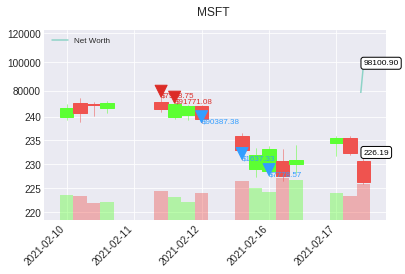

Step: 17
Balance: 142.58485166080754
Shares held: 417 (Total sold: 414)
Avg cost for held shares: 239.33642345119858 (Total sales value: 99769.8281273351)
Net worth: 94688.10662476525 (Max net worth: 100606.3996763221)
Profit: -5311.893375234751
Step: 18
Balance: 27862.774748687436
Shares held: 294 (Total sold: 537)
Avg cost for held shares: 239.33642345119858 (Total sales value: 127490.01802436172)
Net worth: 94120.78962450716 (Max net worth: 100606.3996763221)
Profit: -5879.210375492839
Step: 19
Balance: 73880.5241809914
Shares held: 94 (Total sold: 737)
Avg cost for held shares: 239.33642345119858 (Total sales value: 173507.7674566657)
Net worth: 95508.86641417426 (Max net worth: 100606.3996763221)
Profit: -4491.133585825737
Step: 20
Balance: 73880.5241809914
Shares held: 94 (Total sold: 737)
Avg cost for held shares: 239.33642345119858 (Total sales value: 173507.7674566657)
Net worth: 95333.58273705546 (Max net worth: 100606.3996763221)
Profit: -4666.417262944538
Step: 21
Balance: 

In [33]:
# 
env = DummyVecEnv([lambda: StockTradingEnv(df)])

model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=1000)

obs = env.reset()
for i in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()